In [ ]:
!nvidia-smi

Thu Nov  2 00:16:51 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install  dgl -f https://data.dgl.ai/wheels/cu117/repo.html
!pip install  dglgo -f https://data.dgl.ai/wheels-test/repo.html

Looking in links: https://data.dgl.ai/wheels/cu117/repo.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.7/91.7 MB 10.4 MB/s eta 0:00:00
Looking in links: https://data.dgl.ai/wheels-test/repo.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.1/116.1 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 56.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=3ee3b601b1acd7686

In [ ]:
import torch
import dgl
import yaml
import pandas as pd
import numpy as np
import gensim
from gensim.models import word2vec
import scipy.sparse as sp
from dgl.nn import SAGEConv
import torch.nn as nn
import torch.nn.functional as F
import dgl.function as fn
import itertools
import os

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


In [ ]:
torch.__version__

'2.1.0+cu118'

In [ ]:
!pip install rdflib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 5.3 MB/s eta 0:00:00


In [ ]:
pip install networkx


In [ ]:
!pip install owlready2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.3/27.3 MB 59.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for owlready2: filename=owlready2-0.44-cp310-cp310-linux_x86_64.whl size=24075308 sha256=0a3ed2163c9a88970c481a133d7923e6d4f1826d12f751de516763a447e80464
  Stored in directory: /root/.cache/pip/wheels/88/e1/04/583b0743b2907f091204baaa0aef9740f5ba5f3d2f6a5aa00d
Successfully built owlready2


In [ ]:

import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
import re
import string
from nltk.corpus import stopwords, brown
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from spacy.matcher import Matcher
from spacy.tokens import Span
from spacy import displacy
import rdflib
from rdflib	import Namespace
from owlready2 import *

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
file_path = 'pmbooktext.txt'
with open(file_path, 'r') as file:
    file_contents = file.read()

In [ ]:
file_path = 'PMI text.txt'
with open(file_path, 'r') as file:
    PMI = file.read()

In [ ]:
text= file_contents+PMI

# Data Preprocessing

In [ ]:
text=text.replace('PMBOK® Guide — Fourth Edition','')
text=text.replace('®','')
text=text.replace('Project Management Institute\n\nPRACTICE STANDARD\nFOR PROJECT RISK MANAGEMENT\n\n \n\x0cISBN: 978-1-933890-38-8\n\nPublished by:\nProject Management Institute, Inc.\n14 Campus Boulevard\nNewtown Square, Pennsylvania 19073-3299 USA.\nPhone: +610-356-4600\nFax: +610-356-4647\nE-mail: customercare@pmi.org\n\nInternet: www.pmi.org\n©2009 Project Management Institute, Inc. All rights reserved.\n\n“PMI”, the PMI logo, “PMP”, the PMP logo, “PMBOkK”, “PgMP”, “Project Management Journal”, “PM Network”, and the PMI\nToday logo are registered marks of Project Management Institute, Inc. The Quarter Globe Design is a trademark of the Project\nManagement Institute, Inc. For a comprehensive list of PMI marks, contact the PMI Legal Department.\n\nPMI Publications welcomes corrections and comments on its books. Please feel free to send comments on typographical,\nformatting, or other errors. Simply make a copy of the relevant page of the book, mark the error, and send it to: Book Editor,\nPMI Publications, 14 Campus Boulevard, Newtown Square, PA 19073-3299 USA.\n\nTo inquire about discounts for resale or educational purposes, please contact the PMI Book Service Center.\nPMI Book Service Center\nP.0. Box 932683, Atlanta, GA 31193-2683 USA\nPhone: 1-866-276-4764 (within the U.S. or Canada) or +1-770-280-4129 (globally)\nFax: +1-770-280-4113\nE-mail: book.orders@pmi.org\n\nPrinted in the United States of America. No part of this work may be reproduced or transmitted in any form or by any means,\nelectronic, manual, photocopying, recording, or by any information storage and retrieval system, without prior written\npermission of the publisher.\n\nThe paper used in this book complies with the Permanent Paper Standard issued by the National Information Standards\nOrganization (Z39.48—1 984).\n\n10987654321\n\nSet Cask)\n\nProduct group from well-managed\n\nforests, controlled sources and\nPenner kg\n\nwwwsc.org Cert no. SW-COC-001530\nCree eern renicel\n\n \n\x0c \n\nNOTICE\n\nThe Project Management Institute, Inc. (PMI) standards and guideline publications, of which the document\ncontained herein is one, are developed through a voluntary consensus standards development process. This\nprocess brings together volunteers and/or seeks out the views of persons who have an interest in the topic\ncovered by this publication. While PMI administers the process and establishes rules to promote fairness in\nthe development of consensus, it does not write the document and it does not independently test, evaluate,\nor verify the accuracy or completeness of any information or the soundness of any judgments contained in its\nstandards and guideline publications.\n\n \n\nPMI disclaims liability for any personal injury, property or other damages of any nature whatsoever, whether\nspecial, indirect, consequential or compensatory, directly or indirectly resulting from the publication, use of\napplication, or reliance on this document. PMI disclaims and makes no guaranty or warranty, expressed or\nimplied, as to the accuracy or completeness of any information published herein, and disclaims and makes no\nwarranty that the information in this document will fulfill any of your particular purposes or needs. PMI does\nnot undertake to guarantee the performance of any individual manufacturer or seller\'s products or services by\nvirtue of this standard or guide.\n\nIn publishing and making this document available, PMI is not undertaking to render professional or other\nservices for or on behalf of any person or entity, nor is PMI undertaking to perform any duty owed by any person\nor entity to someone else. Anyone using this document should rely on his or her own independent judgment\nor, as appropriate, seek the advice of a competent professional in determining the exercise of reasonable care\nin any given circumstances. Information and other standards on the topic covered by this publication may\nbe available from other sources, which the user may wish to consult for additional views or information not\ncovered by this publication.\n\nPMI has no power, nor does it undertake to police or enforce compliance with the contents of this document.\nPMI does not certify, test, or inspect products, designs, or installations for safety or health purposes. Any\ncertification or other statement of compliance with any health or safety-related information in this document\nshall not be attributable to PMI and is solely the responsibility of the certifier or maker of the statement.\n\x0c\x0cTABLE OF CONTENTS\n\n \n\n \n\n \n  \n \n  \n  \n\nCHAPTER 1 - INTRODUCTION.........::cccssscsssssesssseseecsseseenessenssesneneanensaesneneanensseeneneanensneneneaneneaees 1\n1.1 Purpose of the Practice Standard for Project Risk ManagemMehit.......0:0:sssee 2\n1.2 Project Risk Management Definition ...........cccscssssseseeeeeseeseessseeneeeeeeeeneneeneeans 4\n1.3 Role of Project Risk Management in Project Management ..........cscsssesseseens 4\n1.4 Good Risk Management Practice..........csscssssesseesssecseeeeeseeeseeeseeeneeeeeeeeneneeeeeeeans 5\n1.5 Critical Success Factors for Project Risk Management... 6\n1.6 COMCIUSION .......c.cccsseeseeeesetsteeeeeeeneeenetenecneeecaneseneneneteneananeneneseneneneneneneeenenesenenenenennane 7\nCHAPTER 2 - PRINCIPLES AND CONCEPTS..........::::scsssssssssssessssesesssseseenesnensseeneneanenssneneneaneneaees 9\n2.1 INtrOMUCTION ........eeseeseeeeeeeeeeeeees 9\n2.2 Definition of Project Risk .......ss:sssseseeeee wd\n\n \n\n2.3 Individual Risks and Overall Project Risk....... ww 10\n2.4 Stakeholder Risk Attitudes .............:000 wi 10\n2.5 Iterative PrOCeSS.......:000 wal\n2.6 COMMUNICATION.........c:ccceeeeesesseeeeteeeeeeeeeeeneeees wal\n2.7 Responsibility for Project Risk Management............+ ww\n2.8 Project Manager’s Role for Project Risk Management... 12\nCHAPTER 3 - INTRODUCTION TO PROJECT RISK MANAGEMENT PROCESSES ...........000000 13\n3.1. Project Risk Management and Project Management... ”\n3.2 Project Risk Management ProCeSSE ......:sssssssessssessseeceeeeseseesteeesneeraneeeeeneneeeneenes\nCHAPTER 4 - PLAN RISK MANAGEMENT .......cccscscsssssssssssssscsesesessssssssscasscecseesssesseessacanacaes 19\n4.1 Purpose and Objectives of the Plan Risk Management Process... 19\n4.2 Critical Success Factors for the Plan Risk Management ProceSS........:0seee 21\n4.2.1 Identify and Address Barriers to Successful Project\nRisk Mamagementl........secssessseessseecsseseeeseestseecraeecaneeeeeneneeeeeenaeecaneeeseneneeennenes 21\n4.2.2 Involve Project Stakeholders in Project Risk Management.........:00000 22\n4.2.3 Comply with the Organization’s Objectives, Policies, and Practices... 22\n4.3 Tools and Techniques for the Plan Risk Management Process... 22\n4.3.1 Planning S€SSIONS .......ccssesesssessseeeeeeeeeeeeeesenseeeeneeeeeneneeeneenseeeaneeeeeneneeeneenee 22\n4.3.2 T@MplateS.....cscssssssssesssesssseseeseseeecorseaseeseeeensrseoeesseseeaeaeseseeesenaearaesenesecananars 23\n4.4 Documenting the Results of the Plan Risk Management ProCeSS .......0ssee 23\n\n©2009 Project Management Institute. Practice Standard for Project Risk Management\n\x0cTABLE OF CONTENTS\n\n \n\nCHAPTER 5 - IDENTIFY RISKS........cccssssssscsssesssssssssssscsescsssssssssssseeacaeecssesesesessesracanecnsesssesees 25\n5.1 Purpose and Objectives of the Identify Risks PrOC@SS...........ssssssssssseeeee 25\n5.2 Critical Success Factors for the Identify RiskS PrOCESS .......::ssssssssseseeeessseeeeees 25\n\n  \n \n  \n  \n \n \n \n \n \n \n  \n \n \n  \n\n5.2.1 Early Identification.........ccsssssssssesssseseseeseecssseesseeesecssseseeeseearoneeaeenses 25\n5.2.2 Iterative Identification ........scssesesssseseseeeesessseeseeeesrssseseeeeeeeseeseeneees 26\n5.2.3 Emergent Identification........ccscscscsssesssssseesseeesessseeseseeeeessenenenenennenaneees 26\n5.2.4 Comprehensive Identification ........ssssssssssssessesseeeecssseeseeeeerseeeeeseees 26\n5.2.5 Explicit Identification of Opportunities ..........sssesesesssseeseeeeeeseseeeeeees 26\n5.2.6 Multiple Perspectives ........sssscsssssssscsssreseessscssseesseeececsisseseseeeccosesssessets 26\n5.2.7 Risks Linked to Project Objectives ........sssssssssssssseesesessseeseeeeeeseseeeseee 26\n5.2.8 Complete Risk StateMent.......cscscsssesesesesseeeseeeeccsiseeseseeeersisseeneees 26\n5.2.9 Ownership and Level Of Detail .........sssssssssscssssesseeesessseeseeeeeesesseeneees 27\n5.2.10 Objectivity ......cccccsssesssssssscscscssssssssssessacscscecsseessssssesaeacaeecssesssessoenaeacaesees 27\n5.3 Tools and Techniques for the Identify Risks PrOCeSS...........:sssssssssessssseeeeee 27\n5.3.1 Historical REVICW.....csscscssssssseeesesaseseseeeesecssseeeeeseeecorosaeeeeeeeeaeoniearenees 28\n5.3.2 Current ASSESSMENES ......:ssseeseeeseseseeeeeeeeeeeeneseeeeeeeeeecneeseneeeeeeaeanieneeneeee 28\n5.3.3 Creativity TECHNIQUES ......:s:scsesssesessseeeeeeeeeeesseeeeeeeesecirosseeeeeeeearneeneeneese 28\n5.4 Documenting the Results of the Identify RiskS PrOC@SS.......::ssssseeeeeeeeees 29\nCHAPTER 6 - PERFORM QUALITATIVE RISK ANALYSIS.........csssssssscsscsssessssssssssaescscsseeseeeees 31\n6.1 Purpose and Objectives of the Perform Qualitative Risk Analysis Process......... 31\n6.2 Critical Success Factors for the Perform Qualitative Risk Analysis Process...... 31\n6.2.1 Use Agreed-Upon Approach........csssssssssssssscsssssseeeesesisseeeseneerorisseenees 32\n6.2.2 Use Agreed-Upon Definitions Of Risk Terms.........sssssessseseeeeeaeeees 32\n6.2.3 Collect High-Quality Information about RISKS... 33\n6.2.4 Perform Iterative Qualitative Risk AMalySiS .......sssssssssseseeessseeeseees 33\n6.3 Tools and Techniques for the Perform Qualitative Risk Analysis Process........... 33\n6.3.1 Select Risk Characteristics that Define Risks’ Importance... 34\n6.3.2 Collect and AmalyZe Data.......csscscsssssssesesesssseeeeeeecssseseeeeeersiseeensees 34\n6.3.3 Prioritize Risks by Probability and Impact on Specific Objectives.......... 34\n6.3.4 Prioritize Risks by Probability and Impact on Overall Project.............0 34\n6.3.5 Categorize Risk CauUSes.......cccscssssssseeseceeesseseseesseseesseeesseneneneneneeeaneess 35\n6.3.6 Document the Results of the Perform Qualitative Risk\nAtnalySis PrOC@SS.....:.:sssssssssssssseeeseeececssseseesseseeoeeseesesnsanasaeeeseneeacanonaeseeese 35\n\n©2009 Project Management Institute. Practice Standard for Project Risk Management\n\x0cTABLE OF CONTENTS CT\n\n \n\nCHAPTER 7 - PERFORM QUANTITATIVE RISK ANALYSIS ........sscssssscscsesessssseseeesescseeeseseees 37\n7.1 Purpose and Objectives of the Perform Quantitative Risk Analysis Process...... 37\n\n7.2 Critical Success Factors for the Perform Quantitative Risk Analysis Process ... 38\n7.2.1 Prior Risk Identification and Qualitative Risk AnalySis........:ssssssee 39\n\n  \n \n  \n \n  \n   \n\n7.2.2 Appropriate Project MOdEI  ','')
text=text.replace('.........ssssssssesssesesssesesseeeessssseeseeeeerirseeeentees 39\n7.2.3 Commitment to Collecting High Quality Risk Data.........cccsesseeen 39\n7.2.4 Unbiased Dat.....ccssssssssssssssseeeessssseesesesesisaseseeseseeesorissesesesneninsensensees 39\n7.2.5 Overall Project Risk Derived from Individual RISKS... 39\n7.2.6 Interrelationships Between Risks in Quantitative Risk Analysis............. 40\n7.3 Tools and Techniques for the Perform Quantitative Risk Analysis Process........ 40\n7.3.1 Comprehensive Risk Representation... 40\n7.3.2 Risk Impact CalCulation ........ccsccscsssesessesessssseeseeeeesssseeeeeeeenirseseeesees 40\n7.3.3 Quantitative Method Appropriate to Analyzing Uncertainty ............:0000 40\n\n7.3.4 Data Gathering Tools ..........ccscsscsseessssesseseeeesesseessseesseeseneeeneneeeteneineeeneneess 40\n7.3.5 Effective Presentation of Quantitative Analysis Results... 41\n\n7.3.6 Iterative Quantitative Risk AMmalySiS.........sssssssssssssesesssseeseeeeesssseeeecees 42\n\n7.3.7 Information for Response Planning ........sssssscssessssseseseeeseeeeeeteteeseeeneneees 42\n\n7.4 Documenting the Results of the Perform Quantitative Risk Analysis Process... 42\nCHAPTER 8 - PLAN RISK RESPONSES .......cscssscssssssssssssscsssessssssssssssacecsceeesesesseeosaeanecsceeeeeees 43\n8.1 Purpose and Objectives of the Plan Risk Responses ProCeSS.........::sssssssseee 43\n8.2 Critical Success Factors for the Plan Risk Responses ProCeSS ........ssssssseseees 44\n8.2.1 COMMUNICATE.......cccccssecseeeeesesseeseennseeeeeseeesesnaseeeeseeeeesnaeeeseseeeeananseneentess 44\n\n8.2.2 Clearly Define Risk-Related Roles and Responsibilities ..........1sssssse 45\n\n8.2.3 Specify Timing Of Risk RESPONSES........sscsssssssesseeeessiseeeseeeeensseseeetes 45\n\n8.2.4 Provide Resources, Budget, and Schedule for RESPONSES........s:ssssese 45\n\n8.2.5 Address the Interaction of Risks and RESPONSES... 45\n\n8.2.6 Ensure Appropriate, Timely, Effective, and Agreed-Upon Responses...... 46\n\n8.2.7 Address Both Threats and Opportunities.........ssesscscsssseeseeeesssseeescees 46\n\n8.2.8 Develop Strategies before Tactical RESPONSES... 46\n\n8.3 Risk Response Strategies .......cssscscssssseeseseeessesseesesecseeeseeeceseeeneneneeseenaneeenenenenees 46\n8.3.1 Avoid a Threat or Exploit an Opportunity.........cceccssssseeseeeerssseeeesees 47\n\n8.3.2 Transfer a Threat or Share an Opportunity ........ccscccscsssssseseeesessseeeeeees 47\n\n8.3.3 Mitigate a Threat or Enhance an Opportunity .........ccssssssesceeesssseseseees 47\n\n8.3.4 Accept a Threat or an OppoOrtuniity.........ccccscssssssseseseessssseseeeeeeneseeeeeeees 47\n\n8.3.5 Applying Risk Response Strategies to Overall Project Risk ........:s:00000 47\n\n©2009 Project Management Institute. Practice Standard for Project Risk Management\n\x0c   \n\n  \n\n8.4 Tools and Techniques for the Plan Risk Responses ProCeSS.........:ssssssssceeee 47\n8.4.1 Response Identification........ccsscssssesssssessessseesseeescsesseseseseersesseeneees 48\n8.4.2 Response Selection .........sssssssssssseessesesseeesecsisseeeeesesesssosseseeesecarorsensenses 48\n8.4.3 ACTION PIANMING.........cccssescseeeeeseeeeeeeeseesteeeneeseeeeseteneteeecanecenenenenenennanenanees 48\n8.4.4 Ownership and Responsibility AsSignment.........ss:ssssseseseeerseseeeseees 48\n8.5 Documenting the Results of the Plan Risk Responses PrOCeSS ......s+sssseseee 50\n8.5.1 Add Risk Responses to the Risk Register... 50\n8.5.2 Add Corresponding Risk Responses to the Project\nManagement Plan.......csssssscsssssssecssecseessseseesssseeseecseecsseneneneneesennanecseeneneeens 50\n8.5.3 Review and Document Predicted ExpOSUure........sssssscssssesseeseerssseeeseees 50\nCHAPTER 9 - MONITOR AND CONTROL RISKS........c:ccssscscsessssssssssscsescssessessseserasacatecseesseeees 51\n9.1 Purpose and Objectives of the Monitor and Control Risks Process... 51\n9.2 Critical Success Factors for the Monitor and Control Risks Process... 53\n9.2.1 Integrate Risk Monitoring and Control\nwith Project Monitoring and Control.........cscessssseessseseeseesseneeeeeeeeeees 53\n9.2.2 Continuously Monitor Risk Trigger Conditions. ...........cssseeeeeees 54\n9.2.3 Maintain Risk AWareneSS......sssssssssssessseescsiseseseeeeecrisseseeeeeeconsessenees 54\n9.3 Tools and Techniques for the Monitor and Control Risks Process............:000+ 54\n9.3.1 Managing Contingency RES@rveS.........ssssscssscsseessseseeseessseeeeetsteneeeeneess 54\n9.3.2 Tracking Trigger CONCITIONS ...........sssestessseeseeeeeeteeetseeeeneeenenenetetetneenenenes 55\n9.3.3 Tracking Overall Risk........ccssccsscsssesssseseesseesseeeseseneeseesenecenenesenesenneeaneess 55\n9.3.4 Tracking COMPIIANCe.........cccsccseceeeeesseesteeeeeseeeeseesteeseeeeneeeneneeeteneineaneeeees 55\n9.4 Documenting the Results of the Monitor and Control Risks Process .........0:00 55\nAPPENDICES.......c:sssssssscscsesessssssssssceecscessesseoeeeseacaeecseeeeseseseeeeacaeecaseesseseoseeseacasacacesesesessenanacans 57\nAPPENDIX A - GUIDELINES FOR A PMI PRACTICE STANDARD........::csssssssssessscsssesssssssessscans 57\nA.A IMtrOGQUCTION ........cccectsestsseeseeeeseeeseeeeeecneseeeeeeeeacaseeseeesenecaeaeseseeetananaeeeeenesacanonaeneeese 57\nAPPENDIX B - EVOLUTION OF PMI’S PRACTICE STANDARD FOR PROJECT RISK\nMANAGEMENT. .sssssssscsssesssssssssssscscecssesssssssessseacaceceseseseseseaeacacaceceseseseseosaeacacacesesesessssoeanaeacaesens 59\nB17 Pre-Project......sssssssssssscscsssssessseeeereseesesesaseeeeeesesecacasosseseseeecasasesesesesaraeaeeenesnsananaeess 59\nB.2 Preliminary WOrK......cscccssssssescseeeesseseecsisesseeeeesacosossesesesecacsseseseseseearsesesesntannaeees 60\nB.3 ScCOpe CHANGES .......ssessssecsecseeeseeeeseeeeseeeeeeceeeeeeeneeeseeeanececeneneneneeeseeeaneceneneneneneeenenane 60\n\n©2009 Project Management Institute. Practice Standard for Project Risk Management\n\x0cTABLE OF CONTENTS CT\n\nAPPENDIX C - CONTRIBUTORS AND REVIEWERS OF THE PRACTICE STANDARD FOR PROJECT\n\n \n\nRISK MANAGEMENT ...sssssssssssssssssssssscssecsssssssssssssscacaceceseseseseseseacacacecaseseseseaeseaeacacecesesssesaeanacacas 61\nC.1 Practice Standard for Project Risk Management Project Core Team.........00+0+ 61\nC.2 Significant ContributOrs ..........ecssecseeeeeeeseessestseetseeeeeeeeseeneeetenenaeeeaneseneneneseennanaees 61\nC.3. Practice Standard for Project Risk Management Team Membe!S.......+1+++000000000 62\nC.4_ Final Exposure Draft Reviewers and Contributors ........cccssssesssersssseeeeneseees 65\nC.5 PMI Standards Member Advisory Group (MAG) .......s:ssscssesssecsseseeesseeeeetseeeneeees 66\nC.6 Staff COMtrIDUtOM.........ccsssesseeceeteeeseseeeeeseeeeseeeeeeenseeseeeeeeecsoeneseneseraeesseseseeananaees 67\nAPPENDIX D - TOOLS, TECHNIQUES AND TEMPLATES FOR PROJECT RISK MANAGEMENT.......69\nD.1_ Techniques, Examples and Templates for Risk Management Planning\n(Chapter 4) ......ssesssccsscsssesssesseessesesneceseneeeeeneeeeeaeaneceseneneeenesenacaneceneneneneneeeonnanecenenees 69\nD.1.1  TOCHMIQUES.......cccsssssesseeectecstsseeeeeneeereeeeeeeeeanseeseeeeeeeraneeseneneeecarasseseeneatanaees 69\nD.2 Techniques, Examples and Templates for Identify Risks (Chapter 5) ..........+ 72\nD.2.1 TOCHMIQUES .....:cccsssssseseseeceresssseeeeeneeereeeeeeseeaneaeeeseeecesaneeseneeetecaeanseseeesananaees 76\nD.3 Techniques, Examples and Templates for Qualitative Risk Analysis\n(Chapter 6) ......sscssscssscssseseeeessesceesneceseseseneneeeseaeaneceseneneeeseeeonacaneseseneneneneenonananecenenees 86\n\n \n \n\nD.3.1 Techniques for Perform Qualtitative Risk AnalySis .........s:ssssesees 86\nD.4_ Techniques, Examples and Templates for Quantitative Risk Analysis\n(Chapter 7) ...sesssessscscsecsseessseeseesseeeneceseeeeeeeseeeeeeeaueceseneneeeneeeonaeaneceseneneneneeeonnanenesenees 91\nD.4.1 Techniques for Perform Quantitative Risk AnalySis ........:s:csssessees 91\nD.5 Techniques, Examples, and Templates for Plan Risk Responses (Chapter 8)..... 96\nD.5.1 Techniques for Plan Risk RESPOMSEC.......:ssssssssseseecssssssseeeeeeeseeeeeeeeneaees 96\nD.6 Techniques, Examples and Templates for Monitor and Control Risks\n(Chapter 9) ...ssssssccscssssssssseescecssssseeeeeeeeacossesesesesecaeaesesesssesecaeaesesesesasavaeaesesesneananaeass\nD.6.1 Techniques for Monitor and Control Risks Process .. vs\nAPPENDIX E — REFERENCES .........cscssscscssssssssssssscscscecssssssessseasacecaceeesesessseeasacacaeeseseseessacats\n\n \n\n©2009 Project Management Institute. Practice Standard for Project Risk Management\n\x0c\x0cLIST OF FIGURES\n\n \n\nFigure 1-1.\nFigure 1-2.\nFigure 3-1.\nFigure 4-1.\nFigure 5-1.\nFigure 5-2.\nFigure 6-1.\nFigure 6-2.\nFigure 7-1.\nFigure 7-2.\nFigure 8-1.\nFigure 8-2.\nFigure 9-1.\n\nHierarchy of PMI Project Risk Management ReSOUICES .........:s+:sssssssecseesseseeesseeseeteereeees 2\nCritical Success Factors for Project Risk Management..........::ssssssssssssesesssessesesseseeeeesees 6\nProject Risk Management Process FIOW DiaQram ......:sssssssssssesesssessessessesseeasseecaneseeeneees 17\n\n \n\nKey Areas of Focus for the Plan Risk Management Process\n\nThree Perspectives of Risk Identification. ..........:ssssssseseeeeseseeseeseeeseseeeetseeieeseeeeecaes 27\nCause, Risk, and Effect............sscssssssscssssssscsesssssscscsesesesseaesesecacaesesesacaesesenaeaesesenaeassesenaeans 29\nBuilding Risk Analysis Credibility ............sssssssssssesscsssssssssssssesesssessessersesaeaseeecaneseeeseees 32\n\n \n\nThe Perform Qualitative Risk Analysis Process\n\nComparison of Qualitative and Quantitative Approaches ..........ccsssssssseesseseeesteeeeeiees 38\nStructure of a Quantitative Risk AMAalySis.......csscsssssssssssesssssesiecseeeseeseeceeseeeeseeeesseeeneeeee 41\nCritical Success Factors for Risk Response Planning .........ssssssssssecesseeseesseseeeseeeeeeeeee 44\nThe Steps Involved in Planning Risk RESPONSES. ........sssssssssssesseesssseeeseeeeesteeeieeseseeeeaes 49\nSchematic Representation of the Monitor and Control Risks PrOCeSS.......::ssssseee','')

text=text.replace('introductioncccssscsssssesssseseecsseseenessenssesneneanensaesneneanensseeneneanensneneneaneneaees purpose practice standard project risk project risk management definition cccscssssseseeeeeseeseessseeneeeeeeeeneneeneeans role project risk management project management cscsssesseseens good risk management practicecsscssssesseesssecseeeeeseeeseeeseeeneeeeeeeeneneeeeeeeans critical success factors project risk management comciusion ccccsseeseeeesetsteeeeeeeneeenetenecneeecaneseneneneteneananeneneseneneneneneneeenenesenenenenennane chapter principles conceptsscsssssssssssessssesesssseseenesnensseeneneanenssneneneaneneaees intromuction eeseeseeeeeeeeeeeeees definition project risk sssssseseeeee wd individual risks overall project risk ww stakeholder risk attitudes wi iterative wal communicationcccceeeeesesseeeeteeeeeeeeeeeneeees wal responsibility project risk management ww project manager’s role project risk management chapter introduction project risk management processes project risk management project management ” project risk management processe sssssssessssessseeceeeeseseesteeesneeraneeeeeneneeeneenes chapter plan risk management cccscscsssssssssssssscsesesessssssssscasscecseesssesseessacanacaes purpose objectives plan risk management process critical success factors plan risk management identify address barriers successful project risk mamagementlsecssessseessseecsseseeeseestseecraeecaneeeeeneneeeeeenaeecaneeeseneneeennenes involve project stakeholders project risk comply organization’s objectives policies practices tools techniques plan risk management process planning s€ssions ccssesesssessseeeeeeeeeeeeeesenseeeeneeeeeneneeeneenseeeaneeeeeneneeeneenee tmplatescscssssssssesssesssseseeseseeecorseaseeseeeensrseoeesseseeaeaeseseeesenaearaesenesecananars documenting results plan risk management process project management institute practice standard project risk management table contents chapter identify riskscccssssssscsssesssssssssssscsescsssssssssssseeacaeecssesesesessesracanecnsesssesees purpose objectives identify risks procssssssssssssseeeee critical success factors identify risks process ssssssssseseeeessseeeeees early identificationccsssssssssesssseseseeseecssseesseeesecssseseeeseearoneeaeenses iterative identification scssesesssseseseeeesessseeseeeesrssseseeeeeeeseeseeneees emergent identificationccscscscsssesssssseesseeesessseeseseeeeessenenenenennenaneees comprehensive identification ssssssssssssessesseeeecssseeseeeeerseeeeeseees explicit identification opportunities sssesesesssseeseeeeeeseseeeeeees multiple perspectives sssscsssssssscsssreseessscssseesseeececsisseseseeeccosesssessets risks linked project objectives sssssssssssssseesesessseeseeeeeeseseeeseee complete risk statementcscscsssesesesesseeeseeeeccsiseeseseeeersisseeneees ownership level detail sssssssssscssssesseeesessseeseeeeeesesseeneees objectivity cccccsssesssssssscscscssssssssssessacscscecsseessssssesaeacaeecssesssessoenaeacaesees tools techniques identify risks processsssssssssessssseeeeee historical revicwcsscscssssssseeesesaseseseeeesecssseeeeeseeecorosaeeeeeeeeaeoniearenees current assessmenes ssseeseeeseseseeeeeeeeeeeeneseeeeeeeeeecneeseneeeeeeaeanieneeneeee creativity techniques sscsesssesessseeeeeeeeeeesseeeeeeeesecirosseeeeeeeearneeneeneese documenting results identify risks procssssssseeeeeeeeees chapter perform qualitative risk analysiscsssssssscsscsssessssssssssaescscsseeseeeees purpose objectives perform qualitative risk analysis process critical success factors perform qualitative risk analysis process use agreedupon approachcsssssssssssssscsssssseeeesesisseeeseneerorisseenees use agreedupon definitions risk termssssssessseseeeeeaeeees collect highquality information risks perform iterative qualitative risk amalysis sssssssssseseeessseeeseees tools techniques perform qualitative risk analysis process select risk characteristics define risks’ importance collect amalyze datacsscscsssssssesesesssseeeeeeecssseseeeeeersiseeensees prioritize risks probability impact specific objectives prioritize risks probability impact overall categorize risk cauusescccscssssssseeseceeesseseseesseseesseeesseneneneneneeeaneess document results perform qualitative risk atnalysis procsssssssssssssssseeeseeececssseseesseseeoeeseesesnsanasaeeeseneeacanonaeseeese project management institute practice standard project risk management table contents ct chapter perform quantitative risk analysis sscssssscscsesessssseseeesescseeeseseees','')




text=text.lower()

In [ ]:
def remove_punctuation(text):
    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', '!".?#$%&\'()*+,-/:;<=>@[\\]^_`{|}~')
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
no_ponc=remove_punctuation(text)


In [ ]:
no_ponc=no_ponc.replace('introductioncccssscsssssesssseseecsseseenessenssesneneanensaesneneanensseeneneanensneneneaneneaees 1\n11 purpose of the practice standard for project risk managemmehit00sssee 2\n12 project risk management definition cccscssssseseeeeeseeseessseeneeeeeeeeneneeneeans 4\n13 role of project risk management in project management cscsssesseseens 4\n14 good risk management practicecsscssssesseesssecseeeeeseeeseeeseeeneeeeeeeeneneeeeeeeans 5\n15 critical success factors for project risk management 6\n16 comciusion ccccsseeseeeesetsteeeeeeeneeenetenecneeecaneseneneneteneananeneneseneneneneneneeenenesenenenenennane 7\nchapter 2  principles and conceptsscsssssssssssessssesesssseseenesnensseeneneanenssneneneaneneaees 9\n21 intromuction eeseeseeeeeeeeeeeeees 9\n22 definition of project risk sssssseseeeee wd\n\n \n\n23 individual risks and overall project risk ww 10\n24 stakeholder risk attitudes 000 wi 10\n25 iterative process000 wal\n26 communicationcccceeeeesesseeeeteeeeeeeeeeeneeees wal\n27 responsibility for project risk management ww\n28 project manager’s role for project risk management 12\nchapter 3  introduction to project risk management processes 000000 13\n31 project risk management and project management ”\n32 project risk management processe sssssssessssessseeceeeeseseesteeesneeraneeeeeneneeeneenes\nchapter 4  plan risk management cccscscsssssssssssssscsesesessssssssscasscecseesssesseessacanacaes 19\n41 purpose and objectives of the plan risk management process 19\n42 critical success factors for the plan risk management process0seee 21\n421 identify and address barriers to successful project\nrisk mamagementlsecssessseessseecsseseeeseestseecraeecaneeeeeneneeeeeenaeecaneeeseneneeennenes 21\n422 involve project stakeholders in project risk management00000 22\n423 comply with the organization’s objectives policies and practices 22\n43 tools and techniques for the plan risk management process 22\n431 planning s€ssions ccssesesssessseeeeeeeeeeeeeesenseeeeneeeeeneneeeneenseeeaneeeeeneneeeneenee 22\n432 tmplatescscssssssssesssesssseseeseseeecorseaseeseeeensrseoeesseseeaeaeseseeesenaearaesenesecananars 23\n44 documenting the results of the plan risk management process 0ssee 23\n\n©2009 project management institute practice standard for project risk management\n\x0ctable of contents\n\n \n\nchapter 5  identify riskscccssssssscsssesssssssssssscsescsssssssssssseeacaeecssesesesessesracanecnsesssesees 25\n51 purpose and objectives of the identify risks procssssssssssssseeeee 25\n52 critical success factors for the identify risks process ssssssssseseeeessseeeeees 25\n\n  \n \n  \n  \n \n \n \n \n \n \n  \n \n \n  \n\n521 early identificationccsssssssssesssseseseeseecssseesseeesecssseseeeseearoneeaeenses 25\n522 iterative identification scssesesssseseseeeesessseeseeeesrssseseeeeeeeseeseeneees 26\n523 emergent identificationccscscscsssesssssseesseeesessseeseseeeeessenenenenennenaneees 26\n524 comprehensive identification ssssssssssssessesseeeecssseeseeeeerseeeeeseees 26\n525 explicit identification of opportunities sssesesesssseeseeeeeeseseeeeeees 26\n526 multiple perspectives sssscsssssssscsssreseessscssseesseeececsisseseseeeccosesssessets 26\n527 risks linked to project objectives sssssssssssssseesesessseeseeeeeeseseeeseee 26\n528 complete risk statementcscscsssesesesesseeeseeeeccsiseeseseeeersisseeneees 26\n529 ownership and level of detail sssssssssscssssesseeesessseeseeeeeesesseeneees 27\n5210 objectivity cccccsssesssssssscscscssssssssssessacscscecsseessssssesaeacaeecssesssessoenaeacaesees 27\n53 tools and techniques for the identify risks processsssssssssessssseeeeee 27\n531 historical revicwcsscscssssssseeesesaseseseeeesecssseeeeeseeecorosaeeeeeeeeaeoniearenees 28\n532 current assessmenes ssseeseeeseseseeeeeeeeeeeeneseeeeeeeeeecneeseneeeeeeaeanieneeneeee 28\n533 creativity techniques sscsesssesessseeeeeeeeeeesseeeeeeeesecirosseeeeeeeearneeneeneese 28\n54 documenting the results of the identify risks procssssssseeeeeeeeees 29\nchapter 6  perform qualitative risk analysiscsssssssscsscsssessssssssssaescscsseeseeeees 31\n61 purpose and objectives of the perform qualitative risk analysis process 31\n62 critical success factors for the perform qualitative risk analysis process 31\n621 use agreedupon approachcsssssssssssssscsssssseeeesesisseeeseneerorisseenees 32\n622 use agreedupon definitions of risk termssssssessseseeeeeaeeees 32\n623 collect highquality information about risks 33\n624 perform iterative qualitative risk amalysis sssssssssseseeessseeeseees 33\n63 tools and techniques for the perform qualitative risk analysis process 33\n631 select risk characteristics that define risks’ importance 34\n632 collect and amalyze datacsscscsssssssesesesssseeeeeeecssseseeeeeersiseeensees 34\n633 prioritize risks by probability and impact on specific objectives 34\n634 prioritize risks by probability and impact on overall project0 34\n635 categorize risk cauusescccscssssssseeseceeesseseseesseseesseeesseneneneneneeeaneess 35\n636 document the results of the perform qualitative risk\natnalysis procsssssssssssssssseeeseeececssseseesseseeoeeseesesnsanasaeeeseneeacanonaeseeese 35\n\n©2009 project management institute practice standard for project risk management\n\x0ctable of contents ct\n\n \n\nchapter 7  perform quantitative risk analysis sscssssscscsesessssseseeesescseeeseseees','')

In [ ]:
no_ponc=no_ponc.replace('jecveccecccccccccccccscce','')
no_ponc=no_ponc.replace('©2009','')

## **remove stopwords**

In [ ]:
import nltk
import re
corpus=[]
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = set(stopwords.words('english')) -set([
    "you're", "you've", "she's", "it's", 'who', 'whom', 'am',  'is', 'are', 'was', 'were', 'be','been',
    'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing',"a",
    'other', 'some',  'no', 'nor', 'not', 'own', 'same',  's', 't', 'can', 'don', "don't", 'should',
    "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't",
    'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", "haven't", 'isn', "isn't",
    'will','such','as', 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't",'can'])
def stopwords(text):
# Removing words that contain numbers
    text= re.sub("\S*\d\S*", " ", text).strip()
    text =re.sub('https?://\S+|www\.\S+', ' ', text)
    text=re.sub("\d+", " ", text)
    text = [word for word in text.split() if word not in sw]
    j=" ".join(text)
    corpus.append(j)

    #text = re.sub("[^a-zA-^Z]", " ", text)

    return j

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
no_stop=stopwords(no_ponc)

## **Tokenization**

In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
sentences = sent_tokenize(no_stop)
words = word_tokenize(no_stop)

**split sentences and questions**

In [ ]:
def split_sentences(text):

    text = re.split('[.?]', text)
    return text

In [ ]:
no_stop=no_stop.replace('introductioncccssscsssssesssseseecsseseenessenssesneneanensaesneneanensseeneneanensneneneaneneaees purpose practice standard project risk project risk management definition cccscssssseseeeeeseeseessseeneeeeeeeeneneeneeans role project risk management project management cscsssesseseens good risk management practicecsscssssesseesssecseeeeeseeeseeeseeeneeeeeeeeneneeeeeeeans critical success factors project risk management comciusion ccccsseeseeeesetsteeeeeeeneeenetenecneeecaneseneneneteneananeneneseneneneneneneeenenesenenenenennane chapter principles conceptsscsssssssssssessssesesssseseenesnensseeneneanenssneneneaneneaees intromuction eeseeseeeeeeeeeeeeees definition project risk sssssseseeeee wd individual risks overall project risk ww stakeholder risk attitudes wi iterative wal communicationcccceeeeesesseeeeteeeeeeeeeeeneeees wal responsibility project risk management ww project manager’s role project risk management chapter introduction project risk management processes project risk management project management ” project risk management processe sssssssessssessseeceeeeseseesteeesneeraneeeeeneneeeneenes chapter plan risk management cccscscsssssssssssssscsesesessssssssscasscecseesssesseessacanacaes purpose objectives plan risk management process critical success factors plan risk management identify address barriers successful project risk mamagementlsecssessseessseecsseseeeseestseecraeecaneeeeeneneeeeeenaeecaneeeseneneeennenes involve project stakeholders project risk comply organization’s objectives policies practices tools techniques plan risk management process planning s€ssions ccssesesssessseeeeeeeeeeeeeesenseeeeneeeeeneneeeneenseeeaneeeeeneneeeneenee tmplatescscssssssssesssesssseseeseseeecorseaseeseeeensrseoeesseseeaeaeseseeesenaearaesenesecananars documenting results plan risk management process project management institute practice standard project risk management table contents chapter identify riskscccssssssscsssesssssssssssscsescsssssssssssseeacaeecssesesesessesracanecnsesssesees purpose objectives identify risks procssssssssssssseeeee critical success factors identify risks process ssssssssseseeeessseeeeees early identificationccsssssssssesssseseseeseecssseesseeesecssseseeeseearoneeaeenses iterative identification scssesesssseseseeeesessseeseeeesrssseseeeeeeeseeseeneees emergent identificationccscscscsssesssssseesseeesessseeseseeeeessenenenenennenaneees comprehensive identification ssssssssssssessesseeeecssseeseeeeerseeeeeseees explicit identification opportunities sssesesesssseeseeeeeeseseeeeeees multiple perspectives sssscsssssssscsssreseessscssseesseeececsisseseseeeccosesssessets risks linked project objectives sssssssssssssseesesessseeseeeeeeseseeeseee complete risk statementcscscsssesesesesseeeseeeeccsiseeseseeeersisseeneees ownership level detail sssssssssscssssesseeesessseeseeeeeesesseeneees objectivity cccccsssesssssssscscscssssssssssessacscscecsseessssssesaeacaeecssesssessoenaeacaesees tools techniques identify risks processsssssssssessssseeeeee historical revicwcsscscssssssseeesesaseseseeeesecssseeeeeseeecorosaeeeeeeeeaeoniearenees current assessmenes ssseeseeeseseseeeeeeeeeeeeneseeeeeeeeeecneeseneeeeeeaeanieneeneeee creativity techniques sscsesssesessseeeeeeeeeeesseeeeeeeesecirosseeeeeeeearneeneeneese documenting results identify risks procssssssseeeeeeeeees chapter perform qualitative risk analysiscsssssssscsscsssessssssssssaescscsseeseeeees purpose objectives perform qualitative risk analysis process critical success factors perform qualitative risk analysis process use agreedupon approachcsssssssssssssscsssssseeeesesisseeeseneerorisseenees use agreedupon definitions risk termssssssessseseeeeeaeeees collect highquality information risks perform iterative qualitative risk amalysis sssssssssseseeessseeeseees tools techniques perform qualitative risk analysis process select risk characteristics define risks’ importance collect amalyze datacsscscsssssssesesesssseeeeeeecssseseeeeeersiseeensees prioritize risks probability impact specific objectives prioritize risks probability impact overall categorize risk cauusescccscssssssseeseceeesseseseesseseesseeesseneneneneneeeaneess document results perform qualitative risk atnalysis procsssssssssssssssseeeseeececssseseesseseeoeeseesesnsanasaeeeseneeacanonaeseeese project management institute practice standard project risk management table contents ct chapter perform quantitative risk analysis sscssssscscsesessssseseeesescseeeseseees','')

In [ ]:
split_sentences(no_stop)

['project risk management project risk management includes processes conducting risk management planning identification analysis response planning response implementation monitoring risk a project objectives project risk management are increase probability andor impact positive risks decrease probability andor impact negative risks order optimize chances project success project risk management processes are plan risk management—the process defining conduct risk management activities a project identify risks—tthe process identifying individual project risks as well as sources overall project risk documenting characteristics perform qualitative risk analysis—the process prioritizing individual project risks analysis action assessing probability occurrence impact as well as other characteristics perform quantitative risk analysis—tthe process numerically analyzing combined effect identified individual project risks other sources uncertainty overall project objectives plan risk responses—t

In [ ]:
print(words[:20])

['project', 'risk', 'management', 'project', 'risk', 'management', 'includes', 'processes', 'conducting', 'risk', 'management', 'planning', 'identification', 'analysis', 'response', 'planning', 'response', 'implementation', 'monitoring', 'risk']


## **Lemmetization and Stemming**

In [ ]:
import gensim
import nltk
nltk.download('wordnet')
from nltk.stem import SnowballStemmer,WordNetLemmatizer
def lemmatize_stemming(text):
    stemmer=SnowballStemmer('english')
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        result.append(lemmatize_stemming(token))
    return result

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
processed = preprocess(no_stop)
print(processed)

['project', 'risk', 'manag', 'project', 'risk', 'manag', 'includ', 'process', 'conduct', 'risk', 'manag', 'plan', 'identif', 'analysi', 'respons', 'plan', 'respons', 'implement', 'monitor', 'risk', 'project', 'object', 'project', 'risk', 'manag', 'be', 'increas', 'probabl', 'andor', 'impact', 'posit', 'risk', 'decreas', 'probabl', 'andor', 'impact', 'negat', 'risk', 'order', 'optim', 'chanc', 'project', 'success', 'project', 'risk', 'manag', 'process', 'be', 'plan', 'risk', 'manag', 'the', 'process', 'defin', 'conduct', 'risk', 'manag', 'activ', 'project', 'identifi', 'risk', 'tthe', 'process', 'identifi', 'individu', 'project', 'risk', 'as', 'well', 'as', 'sourc', 'overal', 'project', 'risk', 'document', 'characterist', 'perform', 'qualit', 'risk', 'analysi', 'the', 'process', 'priorit', 'individu', 'project', 'risk', 'analysi', 'action', 'assess', 'probabl', 'occurr', 'impact', 'as', 'well', 'as', 'other', 'characterist', 'perform', 'quantit', 'risk', 'analysi', 'tthe', 'process', 'n

<hr>

<hr>

## **POS Tagging**

After cleaning and tokenizing the text we will tag each word by its nature

In [ ]:
# pos with spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

In [ ]:
import spacy
#nlp = spacy.load("en_core_web_sm")

doc1 = nlp(no_stop)

In [ ]:
for sent in doc1.sents:
    print(sent)

project risk management project risk management includes processes conducting risk management planning identification analysis response planning response implementation monitoring risk a project objectives project risk management are increase probability andor impact positive risks decrease probability andor impact negative risks order optimize chances project success project risk management processes are plan risk management—the process defining conduct risk management activities a project identify risks—tthe process identifying individual project risks as well as sources overall project risk documenting characteristics perform qualitative risk analysis—the process prioritizing individual project risks analysis action assessing probability occurrence impact as well as other characteristics perform quantitative risk analysis—tthe process numerically analyzing combined effect identified individual project risks other sources uncertainty overall project objectives plan risk responses—the

In [ ]:
# Token and Tag
for tok in doc1:
    # print token, dependency, POS tag
    print(tok.text, "-->",tok.dep_,"-->", tok.pos_)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
days --> npadvmod --> NOUN
significant --> amod --> ADJ
impact --> oprd --> NOUN
overall --> amod --> ADJ
functionality --> compound --> NOUN
days --> appos --> NOUN
significant --> amod --> ADJ
impact --> nsubj --> NOUN
overall --> amod --> ADJ
functionality --> dobj --> NOUN
med --> amod --> ADJ
days --> npadvmod --> NOUN
some --> nsubj --> PRON
impact --> ccomp --> VERB
key --> amod --> ADJ
functional --> amod --> ADJ
areas --> dobj --> NOUN
lo --> nsubj --> PROPN
days --> npadvmod --> NOUN
minor --> amod --> ADJ
impact --> ccomp --> NOUN
overall --> amod --> ADJ
functionality --> compound --> NOUN
day --> npadvmod --> NOUN
minor --> amod --> ADJ
impact --> nsubj --> NOUN
secondary --> amod --> ADJ
functions --> nsubj --> NOUN
figure --> ccomp --> VERB
example --> compound --> NOUN
definitions --> compound --> NOUN
levels --> compound --> NOUN
probability --> nsubj --> NOUN
impact --> ccomp --> VERB
four -

100 commonly occurring words with their frequencies

In [ ]:

from collections import Counter
complete_doc = nlp(no_stop)
words = [token.text for token in complete_doc if  not token.is_punct]
word_freq = Counter(words)
# 100 commonly occurring words with their frequencies
common_words = word_freq.most_common(100)
print (common_words)

[('risk', 2080), ('project', 1766), ('management', 978), ('a', 823), ('be', 695), ('risks', 623), ('is', 533), ('are', 454), ('as', 438), ('analysis', 418), ('process', 392), ('plan', 381), ('may', 352), ('should', 263), ('can', 256), ('responses', 243), ('pmp', 188), ('e', 186), ('standard', 179), ('practice', 174), ('individual', 172), ('not', 172), ('overall', 171), ('response', 170), ('impact', 168), ('objectives', 161), ('cost', 152), ('quantitative', 149), ('probability', 148), ('information', 146), ('used', 144), ('other', 142), ('techniques', 142), ('described', 142), ('section', 141), ('include', 128), ('register', 126), ('level', 125), ('institute', 124), ('data', 122), ('perform', 120), ('identify', 119), ('will', 119), ('stakeholders', 115), ('team', 111), ('schedule', 111), ('identified', 109), ('tools', 103), ('chapter', 103), ('figure', 101), ('organization', 100), ('qualitative', 98), ('also', 98), ('such', 97), ('identification', 96), ('actions', 93), ('processes', 92)

**Unique words**

In [ ]:
unique_words = [word for (word, freq) in word_freq.items() if freq == 1]
print (unique_words[:20])

['bat', 'ile', 'sy', 'bae', 'sshd', 'wh', 'mesh', 'eee', 'sba', 'bitte', 'prb', 'ryote', 'pati', 'am', 'lepers', 'bor', 'sts', 'conflicting', 'balancing', 'deviate']


list of Verb tokens

In [ ]:
 print("Verbs:", [token.text for token in doc1 if token.pos_ == "VERB"])

Verbs: ['includes', 'conducting', 'planning', 'monitoring', 'increase', 'decrease', 'defining', 'identify', 'identifying', 'perform', 'prioritizing', 'risks', 'assessing', 'perform', 'analyzing', 'combined', 'identified', 'risks', 'plan', 'developing', 'selecting', 'agreeing', 'address', 'treat', 'implement', 'implementing', 'monitor', 'monitoring', 'plans', 'tracking', 'identified', 'identifying', 'analyzing', 'evaluating', 'provides', 'presented', 'defined', 'enterprise', 'outputs', 'bat', 'inputs', 'enterprise', 'gathering', 'making', 'inputs', 'inputs', 'enterprise', 'gathering', 'lists', 'updates', 'outputs', 'register', 'updates', 'bitte', 'work', 'prb', 'tools', 'updates', 'project', 'figure', 'inputs', 'enterprise', 'gathering', 'representations', 'updates', 'guide', 'varying', 'deliver', 'responding', 'conflicting', 'changing', 'choose', 'take', 'controlled', 'create', 'balancing', 'aims', 'identify', 'addressed', 'have', 'fail', 'achieve', 'defined', 'effectiveness', 'related

In [ ]:
tags=nltk.pos_tag(no_stop.split())

In [ ]:
print(tags)

[('project', 'NN'), ('risk', 'NN'), ('management', 'NN'), ('project', 'NN'), ('risk', 'NN'), ('management', 'NN'), ('includes', 'VBZ'), ('processes', 'VBZ'), ('conducting', 'VBG'), ('risk', 'NN'), ('management', 'NN'), ('planning', 'VBG'), ('identification', 'NN'), ('analysis', 'NN'), ('response', 'NN'), ('planning', 'NN'), ('response', 'NN'), ('implementation', 'NN'), ('monitoring', 'NN'), ('risk', 'NN'), ('a', 'DT'), ('project', 'NN'), ('objectives', 'VBZ'), ('project', 'NN'), ('risk', 'NN'), ('management', 'NN'), ('are', 'VBP'), ('increase', 'JJ'), ('probability', 'NN'), ('andor', 'JJ'), ('impact', 'NN'), ('positive', 'JJ'), ('risks', 'NNS'), ('decrease', 'VBP'), ('probability', 'NN'), ('andor', 'JJ'), ('impact', 'NN'), ('negative', 'JJ'), ('risks', 'NNS'), ('order', 'NN'), ('optimize', 'NN'), ('chances', 'NNS'), ('project', 'NN'), ('success', 'NN'), ('project', 'NN'), ('risk', 'NN'), ('management', 'NN'), ('processes', 'NNS'), ('are', 'VBP'), ('plan', 'JJ'), ('risk', 'VBP'), ('mana

## **Chunking with NLTK**

Extract entities and relations between them

extract sentences from text having specific patern

extract text with specific pattern. So we startedd with a simple pattern which describe a sentence in this format
NN(Noun) + (VBZ)Verb + Adjective(ADJ) + Noun(NN)

In [ ]:
import nltk
#"NP:{<DT>?<JJ>*<NN>}"
grammar="Chunk:{<NN.?><VB.?><JJ>*<NN.?>}"
chunkParser = nltk.RegexpParser(grammar)
chunked = chunkParser.parse(tags)
print(chunked)


(S
  project/NN
  risk/NN
  management/NN
  project/NN
  risk/NN
  management/NN
  includes/VBZ
  processes/VBZ
  conducting/VBG
  risk/NN
  (Chunk management/NN planning/VBG identification/NN)
  analysis/NN
  response/NN
  planning/NN
  response/NN
  implementation/NN
  monitoring/NN
  risk/NN
  a/DT
  (Chunk project/NN objectives/VBZ project/NN)
  risk/NN
  (Chunk management/NN are/VBP increase/JJ probability/NN)
  andor/JJ
  impact/NN
  positive/JJ
  (Chunk risks/NNS decrease/VBP probability/NN)
  andor/JJ
  impact/NN
  negative/JJ
  risks/NNS
  order/NN
  optimize/NN
  chances/NNS
  project/NN
  success/NN
  project/NN
  risk/NN
  management/NN
  processes/NNS
  are/VBP
  plan/JJ
  risk/VBP
  management—the/JJ
  (Chunk process/NN defining/VBG conduct/NN)
  risk/NN
  management/NN
  activities/NNS
  a/DT
  (Chunk project/NN identify/VBZ risks—tthe/JJ process/NN)
  identifying/VBG
  individual/JJ
  project/NN
  risks/NNS
  as/RB
  well/RB
  as/IN
  sources/NNS
  overall/JJ
  project/

In [ ]:
nltk.download('conll2000')
from nltk.corpus import conll2000
from nltk.chunk import ChunkParserI#Define the chunker class
from nltk.chunk.util import tree2conlltags,conlltags2tree
from nltk.tag import UnigramTagger, BigramTagger

data= conll2000.chunked_sents()

[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.


In [ ]:
train_data=data[:10900]
test_data=data[10900:]

In [ ]:
def conll_tag_chunks(chunk_sents):
    tagged_sents = [tree2conlltags(tree) for tree in chunk_sents]
    return [[(t, c) for (w, t, c) in sent] for sent in tagged_sents]

In [ ]:
def combined_tagger(train_data, taggers, backoff=None):
    for tagger in taggers:
        backoff = tagger(train_data, backoff=backoff)
    return backoff

In [ ]:

#Define the chunker class
class NGramTagChunker(ChunkParserI):

    def __init__(self,train_sentences,tagger_classes=[UnigramTagger,BigramTagger]):
        train_sent_tags=conll_tag_chunks(train_sentences)
        self.chunk_tagger=combined_tagger(train_sent_tags,tagger_classes)

    def parse(self,tagged_sentence):
        if not tagged_sentence:
            return None

        pos_tags=[tag for word, tag in tagged_sentence]
        chunk_pos_tags=self.chunk_tagger.tag(pos_tags)
        chunk_tags=[chunk_tag for (pos_tag,chunk_tag) in chunk_pos_tags]
        wpc_tags=[(word,pos_tag,chunk_tag) for ((word,pos_tag),chunk_tag) in zip(tagged_sentence,chunk_tags)]

        return conlltags2tree(wpc_tags)

In [ ]:

ntc=NGramTagChunker(train_data)

#evaluate chunker model performance
print(ntc.evaluate(test_data))

ChunkParse score:
    IOB Accuracy:  90.0%%
    Precision:     82.1%%
    Recall:        86.3%%
    F-Measure:     84.1%%


<ipython-input-41-de7f05bf3f4b>:4: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  print(ntc.evaluate(test_data))


## **Bag of words**

In [ ]:
import gensim
from gensim import corpora


# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary([no_stop.split()])
# convert tokenized documents into a document-term matrix
bow_corpus = [dictionary.doc2bow(text) for text in [no_stop.split()]]

In [ ]:
print(bow_corpus)

[[(0, 823), (1, 1), (2, 1), (3, 1), (4, 1), (5, 6), (6, 5), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 10), (13, 17), (14, 17), (15, 14), (16, 1), (17, 7), (18, 1), (19, 1), (20, 3), (21, 3), (22, 2), (23, 15), (24, 2), (25, 2), (26, 1), (27, 2), (28, 1), (29, 4), (30, 4), (31, 2), (32, 1), (33, 1), (34, 2), (35, 7), (36, 3), (37, 5), (38, 15), (39, 3), (40, 1), (41, 1), (42, 1), (43, 7), (44, 1), (45, 4), (46, 70), (47, 1), (48, 93), (49, 9), (50, 1), (51, 52), (52, 22), (53, 1), (54, 9), (55, 4), (56, 2), (57, 1), (58, 2), (59, 7), (60, 1), (61, 1), (62, 5), (63, 6), (64, 4), (65, 23), (66, 32), (67, 2), (68, 1), (69, 45), (70, 16), (71, 9), (72, 9), (73, 5), (74, 4), (75, 1), (76, 1), (77, 1), (78, 3), (79, 2), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 7), (86, 3), (87, 1), (88, 1), (89, 5), (90, 1), (91, 2), (92, 1), (93, 1), (94, 3), (95, 1), (96, 1), (97, 24), (98, 10), (99, 1), (100, 3), (101, 2), (102, 3), (103, 1), (104, 1), (105, 5), (106, 1), (107, 2), (108, 1), 

In [ ]:
list(dictionary.values())

['a',
 'abarca',
 'abdul',
 'abhilash',
 'abhimanyu',
 'ability',
 'able',
 'abreu',
 'absence',
 'absorb',
 'academic',
 'accelerate',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'accepting',
 'access',
 'accommodating',
 'accomplishments',
 'accordance',
 'according',
 'accordingly',
 'account',
 'accountability',
 'accountable',
 'accounted',
 'accounting',
 'accumulated',
 'accuracy',
 'accurate',
 'accurately',
 'ace',
 'acer',
 'achievable',
 'achieve',
 'achieved',
 'achievement',
 'achieving',
 'acknowledges',
 'acommon',
 'acquired',
 'acquiring',
 'across',
 'acs',
 'act',
 'action',
 'actionoriented',
 'actions',
 'active',
 'actively',
 'activities',
 'activity',
 'acts',
 'actual',
 'actually',
 'actuaries',
 'adapt',
 'adaptation',
 'adapted',
 'adapting',
 'adaptive',
 'add',
 'added',
 'adding',
 'addition',
 'additional',
 'additionally',
 'addo',
 'address',
 'addressed',
 'addresses',
 'addressing',
 'adds',
 'adequate',
 'adequately',
 'adherence',
 'adju

In [ ]:
bow_doc_0 = bow_corpus[0]
for i in range(len(bow_doc_0)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_0[i][0],
                                               dictionary[bow_doc_0[i][0]],
bow_doc_0[i][1]))

Word 0 ("a") appears 823 time.
Word 1 ("abarca") appears 1 time.
Word 2 ("abdul") appears 1 time.
Word 3 ("abhilash") appears 1 time.
Word 4 ("abhimanyu") appears 1 time.
Word 5 ("ability") appears 6 time.
Word 6 ("able") appears 5 time.
Word 7 ("abreu") appears 1 time.
Word 8 ("absence") appears 1 time.
Word 9 ("absorb") appears 1 time.
Word 10 ("academic") appears 1 time.
Word 11 ("accelerate") appears 1 time.
Word 12 ("accept") appears 10 time.
Word 13 ("acceptable") appears 17 time.
Word 14 ("acceptance") appears 17 time.
Word 15 ("accepted") appears 14 time.
Word 16 ("accepting") appears 1 time.
Word 17 ("access") appears 7 time.
Word 18 ("accommodating") appears 1 time.
Word 19 ("accomplishments") appears 1 time.
Word 20 ("accordance") appears 3 time.
Word 21 ("according") appears 3 time.
Word 22 ("accordingly") appears 2 time.
Word 23 ("account") appears 15 time.
Word 24 ("accountability") appears 2 time.
Word 25 ("accountable") appears 2 time.
Word 26 ("accounted") appears 1 ti

# Data Analysis

### IF-IDF

In [ ]:
sentences

['project risk management project risk management includes processes conducting risk management planning identification analysis response planning response implementation monitoring risk a project objectives project risk management are increase probability andor impact positive risks decrease probability andor impact negative risks order optimize chances project success project risk management processes are plan risk management—the process defining conduct risk management activities a project identify risks—tthe process identifying individual project risks as well as sources overall project risk documenting characteristics perform qualitative risk analysis—the process prioritizing individual project risks analysis action assessing probability occurrence impact as well as other characteristics perform quantitative risk analysis—tthe process numerically analyzing combined effect identified individual project risks other sources uncertainty overall project objectives plan risk responses—t

In [ ]:
#instantiate CountVectorizer()
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text  import CountVectorizer
cv=CountVectorizer()
# this steps generates word counts for the words in your docs
word_count_vector=cv.fit_transform(sentences)
word_count_vector.shape

(1, 3950)

In [ ]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

TfidfTransformer()

In [ ]:
# Get the feature names (terms) from the CountVectorizer
feature_names = cv.get_feature_names_out()

# Create a DataFrame to store IDF values with term names
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=feature_names, columns=["idf_weights"])

# Sort the DataFrame in ascending order of IDF values
df_idf.sort_values(by=['idf_weights'], ascending=True, inplace=True)

# Display the sorted DataFrame
print(df_idf)


             idf_weights
abarca               1.0
permit               1.0
perosio              1.0
persistence          1.0
person               1.0
...                  ...
execute              1.0
executed             1.0
execution            1.0
exercises            1.0
zouza                1.0

[3950 rows x 1 columns]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(sentences)

# Get the feature names (terms) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

print(feature_names)

['abarca' 'abdul' 'abhilash' ... 'zlockie' 'zone' 'zouza']


## Distance Similarity

In [ ]:
def LevenshteinDistance():
  edDictio={}
  for word in processed:
    a=np.random.choice(processed)
    b=np.random.choice(processed)
    ed_sent=nltk.edit_distance(a,b)
    edDictio[a,b]=ed_sent
  print(edDictio)

In [ ]:
LevenshteinDistance()

{('also', 'risk'): 3, ('result', 'mtech'): 6, ('institut', 'constraint'): 6, ('enterpris', 'should'): 9, ('time', 'be'): 3, ('be', 'have'): 3, ('take', 'project'): 6, ('time', 'risk'): 3, ('plan', 'organiz'): 5, ('risk', 'manag'): 5, ('context', 'simpl'): 7, ('express', 'may'): 7, ('object', 'control'): 6, ('probabl', 'project'): 4, ('principl', 'knowledg'): 8, ('reformat', 'output'): 7, ('comprehens', 'risk'): 9, ('technic', 'applic'): 5, ('reflect', 'organ'): 7, ('perspect', 'conting'): 8, ('process', 'risk'): 5, ('manag', 'project'): 7, ('current', 'process'): 6, ('person', 'effect'): 6, ('plan', 'section'): 6, ('institut', 'outlin'): 7, ('situat', 'stabil'): 5, ('situat', 'lesson'): 6, ('musaliyath', 'indic'): 9, ('be', 'risk'): 4, ('seller', 'manag'): 6, ('effect', 'attitud'): 7, ('reliabl', 'project'): 7, ('plan', 'respons'): 6, ('be', 'overal'): 5, ('improv', 'subsequ'): 7, ('manag', 'inform'): 6, ('also', 'reactor'): 5, ('figur', 'plan'): 5, ('plan', 'see'): 4, ('plan', 'risk')

## World cloud

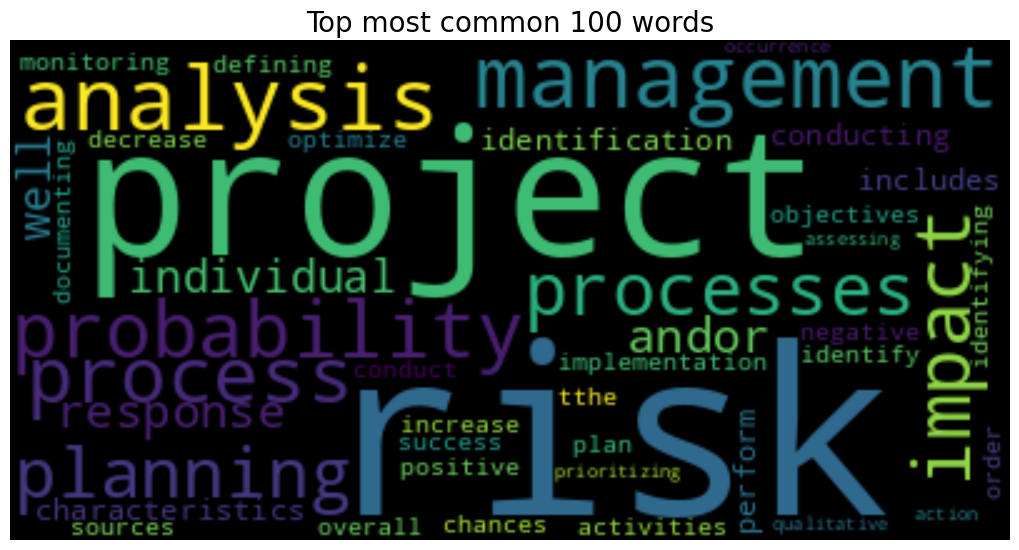

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import imageio
import matplotlib.pyplot as plt
import nltk


# Get 100 words based on the
words_except_stop_dist = nltk.FreqDist(w for w in words[:100])
wordcloud = WordCloud(stopwords=set(STOPWORDS),background_color='black').generate(" ".join(words_except_stop_dist))
plt.imshow(wordcloud,interpolation = 'bilinear')
fig=plt.gcf()
fig.set_size_inches(10,12)
plt.axis('off')
plt.title("Top most common 100 words",fontsize=20)
plt.tight_layout(pad=0)
plt.savefig('risk-managment.jpeg')

<hr>

## **synonyms**

In [ ]:
AllConcepts=[]
AllRelations=[]
for tok in doc1:
    if tok.pos_=="NOUN":
        AllConcepts.append(tok.text)
    if tok.pos_=="VERB":
        AllRelations.append(tok.text)


find synonyms for a given word using WordNet

In [ ]:
from nltk.corpus import wordnet
def find_synonym_ontology(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lm in syn.lemmas():
            synonyms.append(lm.name())
    return list(set(synonyms))



In [ ]:
# Examples
print("Synonyms of project : ", find_synonym_ontology("project"))
print("Synonyms of management: ", find_synonym_ontology("management"))
print("Synonyms of risk: ", find_synonym_ontology("risk"))

Synonyms of project :  ['figure', 'visualize', 'stick_out', 'protrude', 'image', 'throw', 'jut_out', 'send_off', 'labor', 'projection', 'propose', 'see', 'project', 'picture', 'cast', 'jut', 'undertaking', 'contrive', 'design', 'externalize', 'task', 'envision', 'plan', 'visualise', 'fancy', 'externalise']
Synonyms of management:  ['direction', 'management']
Synonyms of risk:  ['jeopardy', 'put_on_the_line', 'take_a_chance', 'adventure', 'hazard', 'danger', 'lay_on_the_line', 'risk_of_infection', 'take_chances', 'risk', 'chance', 'run_a_risk', 'peril', 'risk_of_exposure', 'gamble', 'endangerment']


find synonyms for a given term (concept) from the list of all concepts from PMBOOK and PMI

In [ ]:
def synonymConceptOntoPMB(term):

    if term not in AllConcepts :
        return "it haven't"
    else :
        syno_list=[]
        temp_list=[]
        syno_list = find_synonym_ontology(term)
        if len(syno_list) != 0 :
            for syno  in syno_list :
                if syno in AllConcepts  and syno != term :
                    temp_list.append(syno)

        return temp_list

In [ ]:
print("Synonym of project in our ontology :", synonymConceptOntoPMB('project'))
print("Synonym of scope in our ontology :", synonymConceptOntoPMB('risk'))

Synonym of project in our ontology : ['figure', 'image', 'projection', 'see', 'picture', 'undertaking', 'design', 'task', 'plan']
Synonym of scope in our ontology : ['chance']


this method focuses on finding synonyms for a given term (relation) from the list of all relations stored in AllRelations

In [ ]:
def synonymrelationOntoPMB(term):

    if term not in AllRelations :
        return "it haven't"
    else :
        syno_list=[]
        temp_list=[]
        syno_list = find_synonym_ontology(term)
        if len(syno_list) != 0 :
            for syno  in syno_list :
                if syno in AllRelations  and syno != term :
                    temp_list.append(syno)

        return temp_list

In [ ]:
print("Synonym of work in our ontology :", synonymrelationOntoPMB('plan'))
print("Synonym of work in our ontology :", synonymrelationOntoPMB('impact'))
print("Synonym of work in our ontology :", synonymrelationOntoPMB('build'))

Synonym of work in our ontology : ['design', 'project']
Synonym of work in our ontology : ['affect']
Synonym of work in our ontology : ['figure', 'form', 'construct', 'progress', 'make', 'establish']


<hr>

# Extraction Triples

### **Extract Patterns (concepts , relation , object)**

In [ ]:
def triple():
    Triple=[]
    try:
        for subtree in chunked.subtrees(filter=lambda t: t.label() == 'Chunk'):
              Triple.append(subtree)
    except Exception as e:
        print(str(e))

    return Triple

In [ ]:
print(len(triple()))


2659


In [ ]:
from spacy.matcher import Matcher
from spacy.tokens import Span
from spacy import displacy

In [ ]:
Concepts=[]
relation=[]
object=[]
for i in range(len(triple())-1):
    Concepts.append(triple()[i][0][0])
    relation.append(triple()[i][1][0])
    object.append(triple()[i][2][0])
obj= pd.DataFrame(columns=['Concepts','relation','object'])
obj['Concepts']=Concepts
obj['relation']=relation
obj['object']=object

In [ ]:
obj.drop_duplicates().reset_index(drop=True)

Concepts     relation          object
0           management     planning  identification
1              project   objectives         project
2           management          are        increase
3                risks     decrease     probability
4              process     defining         conduct
...                ...          ...             ...
2205        strategies         risk       threshold
2206         responses  interaction           roles
2207  responsibilities         root           cause
2208              risk     attitude               t
2209           threats       timing           tools

[2210 rows x 3 columns]

## Build the initial Graph

In [ ]:
import plotly.graph_objs as go
# Create a Plotly subplot with a scatter plot
fig = go.Figure()

# Iterate through the DataFrame and add edges
for _, row in obj.iterrows():
    concept = row["Concepts"]
    relation = row["relation"]
    obj_name = row["object"]

    edge_label = f"{concept} --{relation}--> {obj_name}"  # Create a label for the edge

    fig.add_trace(go.Scatter(
        x=[concept, obj_name],
        y=[0, 1],  # Adjust the y-coordinates as needed
        text=[concept, obj_name],
        mode="markers+lines+text",
        marker=dict(size=12),
        line=dict(width=2),
        textposition="top center",
        textfont=dict(size=12),
        line_shape="linear",  # Required for the edge to show up
        name=edge_label  # Add the edge label
    ))

# Customize the layout
fig.update_xaxes(showline=True, showgrid=False, zeroline=False)
fig.update_yaxes(showline=True, showgrid=False, zeroline=False, tickvals=[0, 1], ticktext=["Concepts", "Objects"])

# Set the title
fig.update_layout(title_text="Interactive Graph")

# Save the interactive graph as an HTML file
fig.write_html("initial_grouped_graph.html")


## Create embeddings for entities and relationships

In [ ]:
corpus = []
for index, row in obj.iterrows():
    corpus.append([row['Concepts'], row['relation'], row['object']])

In [ ]:
corpus[0:5]

[['management', 'planning', 'identification'],
 ['project', 'objectives', 'project'],
 ['management', 'are', 'increase'],
 ['risks', 'decrease', 'probability'],
 ['process', 'defining', 'conduct']]

In [ ]:
len(corpus)

2658

In [ ]:
# Intialize the word2Vec model using the Skip-Gram model (sg=1)
word2vec_model = word2vec.Word2Vec(corpus, vector_size=100, window=20, min_count=1, workers=4, sg=1)

In [ ]:
# calculating the word-vector of the a random entity/relationship.
word2vec_model.wv['risk']

array([-0.0095614 ,  0.01558079,  0.00889503,  0.01350573, -0.00713223,
       -0.0368307 ,  0.01764986,  0.0467138 , -0.02021123, -0.01306341,
       -0.0003133 , -0.03514194, -0.00995736,  0.01723394, -0.00487165,
       -0.00970032,  0.00945011, -0.02158859, -0.01424129, -0.04340206,
        0.01708137,  0.01777462,  0.01636555, -0.01852628,  0.00190495,
       -0.00640317, -0.02047968, -0.00920481, -0.02156863,  0.0017534 ,
        0.01287742,  0.0034934 ,  0.01556091, -0.01899701, -0.01790851,
        0.02011343,  0.01025947, -0.02315741, -0.01428862, -0.0381038 ,
       -0.00535383, -0.00848278, -0.0144896 , -0.0045092 ,  0.01692335,
       -0.00023309, -0.02265002,  0.006478  ,  0.00950756,  0.01265842,
        0.00708849, -0.01008536, -0.00999842,  0.00779084, -0.00657504,
        0.00911497,  0.01552295, -0.00548641, -0.0187589 ,  0.02236484,
        0.00645799,  0.00451016, -0.00675239, -0.01583448, -0.02226463,
        0.02083292,  0.00099301,  0.01141967, -0.03643747,  0.02

In [ ]:
# Building embeddings dictionary : key: entity/relation Value: embedding
embeddings = {}
for document in corpus:
    for token in document:
        if token in word2vec_model.wv:
            embeddings[token] = word2vec_model.wv[token]

In [ ]:
len(embeddings)

1685

# Building the entities relationships Graph

In [ ]:
def build_nodes_index(nodes_list):
    unique_nodes_list = []
    for node in nodes_list:
        if node not in unique_nodes_list:
            unique_nodes_list.append(node)

    nodes_index = {}
    index = 0
    for node in unique_nodes_list:
        nodes_index[node] = index
        index+=1
    return nodes_index

In [ ]:
def generate_nodes_indices(nodes_list, nodes_index):
    nodes_indices = []
    for node in nodes_list:
        nodes_indices.append(nodes_index[node])
    return nodes_indices

In [ ]:
source_nodes_concepts = []
destination_nodes_concepts = []
edges_relations = []

for document in corpus:
    source_nodes_concepts.append(document[0])
    destination_nodes_concepts.append(document[1])
    edges_relations.append(document[2])

In [ ]:
nodes = source_nodes_concepts + destination_nodes_concepts

nodes_index = build_nodes_index(nodes)


In [ ]:
source_nodes = generate_nodes_indices(source_nodes_concepts, nodes_index)
destination_nodes = generate_nodes_indices(destination_nodes_concepts, nodes_index)


In [ ]:
nodes_concepts_embeddings = [word2vec_model.wv[concept] for concept in nodes_index.keys()]

In [ ]:
edges_relations_embeddings = [word2vec_model.wv[edge_relation] for edge_relation in edges_relations]

In [ ]:
np.argmax(source_nodes)

2642

In [ ]:
source_nodes[-1]

4

In [ ]:
# Building the graph
graph = dgl.graph((source_nodes, destination_nodes))

In [ ]:
# print number of nodes
print("Number of nodes: {}\n".format(graph.num_nodes()))
# print node IDs
print("Node IDs are: \n{}\n".format(graph.nodes()))

# print number of edges
print("Number of edges: {}\n".format(graph.num_edges()))
# print the source and destination nodes of every edge
print("Source & destination nodes of every edge are: \n{}\n".format(graph.edges()))

# print edge IDs
print("Edge IDs are: \n{}".format(graph.edge_ids(source_nodes, destination_nodes)))

Number of nodes: 1271

Node IDs are: 
tensor([   0,    1,    2,  ..., 1268, 1269, 1270])

Number of edges: 2658

Source & destination nodes of every edge are: 
(tensor([  0,   1,   0,  ...,  34, 139,   4]), tensor([325, 363, 636,  ..., 725,   4, 279]))

Edge IDs are: 
tensor([   0,    1,    2,  ..., 2655,  656, 1431])


## Manipulating Node and Edge Features

In [ ]:
# aadd_newdoc_ufuncssign a 100-dimensional node feature vector called concept for each node
graph.ndata['concept'] = torch.from_numpy(np.array(nodes_concepts_embeddings))
# assign a 100-dimensional edge feature vector called relation for each edge
graph.edata['relation'] = torch.from_numpy(np.array(edges_relations_embeddings))

In [ ]:
# print ndata
print("Node data: \n{}\n".format(graph.ndata))

# print edata
print("Edge data: \n{}".format(graph.edata))

Node data: 
{'concept': tensor([[-0.0117,  0.0161,  0.0015,  ..., -0.0138, -0.0005, -0.0041],
        [-0.0171,  0.0190,  0.0081,  ..., -0.0175, -0.0036,  0.0085],
        [-0.0081,  0.0155, -0.0043,  ..., -0.0118,  0.0129, -0.0041],
        ...,
        [-0.0004, -0.0078, -0.0096,  ..., -0.0011, -0.0008,  0.0021],
        [-0.0063,  0.0072,  0.0090,  ..., -0.0067,  0.0036, -0.0032],
        [-0.0057, -0.0045,  0.0036,  ..., -0.0093,  0.0012, -0.0067]])}

Edge data: 
{'relation': tensor([[ 0.0017, -0.0065,  0.0040,  ...,  0.0041, -0.0051, -0.0072],
        [-0.0171,  0.0190,  0.0081,  ..., -0.0175, -0.0036,  0.0085],
        [ 0.0051,  0.0052,  0.0058,  ...,  0.0014,  0.0019, -0.0051],
        ...,
        [ 0.0043,  0.0073, -0.0079,  ..., -0.0178,  0.0107,  0.0105],
        [ 0.0017, -0.0065,  0.0040,  ...,  0.0041, -0.0051, -0.0072],
        [ 0.0018,  0.0016, -0.0027,  ..., -0.0139,  0.0126, -0.0004]])}


# Link Prediction using GNN

## Split data

In [ ]:
# Split edge set for training and testing
source_nodes, destination_nodes = graph.edges()

edge_ids = np.arange(graph.num_edges())
edge_ids = np.random.permutation(edge_ids)

test_size = int(len(edge_ids) * 0.1)
train_size = graph.num_edges() - test_size

test_pos_source_nodes, test_pos_destination_nodes = source_nodes[edge_ids[:test_size]], destination_nodes[edge_ids[:test_size]]
train_pos_source_nodes, train_pos_destination_nodes = source_nodes[edge_ids[test_size:]], destination_nodes[edge_ids[test_size:]]

# Find all negative edges and split them for training and testing
adj = sp.coo_matrix((np.ones(len(source_nodes)), (source_nodes.numpy(), destination_nodes.numpy())), shape=(graph.num_nodes(), graph.num_nodes()))
adj_neg = 1 - adj.todense() - np.eye(graph.num_nodes())
neg_source_nodes, neg_destination_nodes = np.where(adj_neg != 0)

neg_edge_ids = np.random.choice(len(neg_source_nodes), graph.num_edges())

test_neg_source_nodes, test_neg_destination_nodes = neg_source_nodes[neg_edge_ids[:test_size]], neg_destination_nodes[neg_edge_ids[:test_size]]
train_neg_source_nodes, train_neg_destination_nodes = neg_source_nodes[neg_edge_ids[test_size:]], neg_destination_nodes[neg_edge_ids[test_size:]]

In [ ]:
train_graph = dgl.remove_edges(graph, edge_ids[:test_size])

In [ ]:
train_pos_graph = dgl.graph((train_pos_source_nodes, train_pos_destination_nodes), num_nodes=graph.num_nodes())
train_neg_graph = dgl.graph((train_neg_source_nodes, train_neg_destination_nodes), num_nodes=graph.num_nodes())

test_pos_graph = dgl.graph((test_pos_source_nodes, test_pos_destination_nodes), num_nodes=graph.num_nodes())
test_neg_graph = dgl.graph((test_neg_source_nodes, test_neg_destination_nodes), num_nodes=graph.num_nodes())

In [ ]:
# ----------- 2. create model -------------- #
# build a two-layer GraphSAGE model
class GraphSAGE(nn.Module):
    def __init__(self, in_feats, h_feats):
        super(GraphSAGE, self).__init__()
        self.conv1 = SAGEConv(in_feats, h_feats, "mean")
        self.conv2 = SAGEConv(h_feats, h_feats, "mean")

    def forward(self, graph, in_feat):
        h = self.conv1(graph, in_feat)
        h = F.relu(h)
        h = self.conv2(graph, h)
        return h

In [ ]:
class DotPredictor(nn.Module):
    def forward(self, graph, h):
        with graph.local_scope():
            graph.ndata["h"] = h
            # Compute a new edge feature named 'score' by a dot-product between the
            # source node feature 'h' and destination node feature 'h'.
            graph.apply_edges(fn.u_dot_v("h", "h", "score"))
            # u_dot_v returns a 1-element vector for each edge so you need to squeeze it.
            return graph.edata["score"][:, 0]

In [ ]:
model = GraphSAGE(train_graph.ndata["concept"].shape[1], 16)
# You can replace DotPredictor with MLPPredictor.
# pred = MLPPredictor(16)
predictor = DotPredictor()

In [ ]:
def compute_loss(pos_score, neg_score):
    scores = torch.cat([pos_score, neg_score])
    labels = torch.cat(
        [torch.ones(pos_score.shape[0]), torch.zeros(neg_score.shape[0])]
    )
    return F.binary_cross_entropy_with_logits(scores, labels)


def compute_auc(pos_score, neg_score):
    scores = torch.cat([pos_score, neg_score]).numpy()
    labels = torch.cat(
        [torch.ones(pos_score.shape[0]), torch.zeros(neg_score.shape[0])]
    ).numpy()
    return roc_auc_score(labels, scores)

In [ ]:
# ----------- 3. set up loss and optimizer -------------- #
# in this case, loss will in training loop
optimizer = torch.optim.Adam(
    itertools.chain(model.parameters(), predictor.parameters()), lr=0.01
)

In [ ]:
# ----------- 4. training -------------------------------- #
all_logits = []
epochs = 100
for e in range(epochs):
    # forward
    h = model(train_graph, train_graph.ndata["concept"])
    pos_score = predictor(train_pos_graph, h)
    neg_score = predictor(train_neg_graph, h)
    loss = compute_loss(pos_score, neg_score)

    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if e % 5 == 0:
        print("In epoch {}, loss: {}".format(e, loss))

In epoch 0, loss: 0.7244143486022949
In epoch 5, loss: 0.6792493462562561
In epoch 10, loss: 0.6401237845420837
In epoch 15, loss: 0.6057263612747192
In epoch 20, loss: 0.584343671798706
In epoch 25, loss: 0.5649226307868958
In epoch 30, loss: 0.5500856041908264
In epoch 35, loss: 0.5446475148200989
In epoch 40, loss: 0.5428766012191772
In epoch 45, loss: 0.5408363938331604
In epoch 50, loss: 0.5378987789154053
In epoch 55, loss: 0.5352359414100647
In epoch 60, loss: 0.5333502888679504
In epoch 65, loss: 0.5316140055656433
In epoch 70, loss: 0.5300245881080627
In epoch 75, loss: 0.5285606980323792
In epoch 80, loss: 0.5272083878517151
In epoch 85, loss: 0.5258801579475403
In epoch 90, loss: 0.5245879888534546
In epoch 95, loss: 0.5233017206192017


In [ ]:
# ----------- 5. check results ------------------------ #
from sklearn.metrics import roc_auc_score

with torch.no_grad():
    pos_score = predictor(test_pos_graph, h)
    neg_score = predictor(test_neg_graph, h)
    print("AUC", compute_auc(pos_score, neg_score))

AUC 0.8204200783196867


In [ ]:
unseen_graph = dgl.graph((test_pos_source_nodes, test_pos_destination_nodes), num_nodes=graph.num_nodes())

In [ ]:
import dgl

def create_unseen_graph(unseen_source_nodes, unseen_destination_nodes):
    unseen_graph = dgl.graph((unseen_source_nodes, unseen_destination_nodes))
    return unseen_graph


In [ ]:
graph.ndata['concept'][0]

tensor([-0.0117,  0.0161,  0.0015, -0.0004,  0.0056, -0.0164,  0.0079,  0.0216,
         0.0008, -0.0123,  0.0063, -0.0083,  0.0025, -0.0028,  0.0086, -0.0053,
         0.0122, -0.0142, -0.0096, -0.0065,  0.0063,  0.0024,  0.0134,  0.0013,
        -0.0125,  0.0010, -0.0018, -0.0023, -0.0033,  0.0026,  0.0090, -0.0013,
        -0.0047, -0.0067, -0.0015,  0.0173,  0.0102, -0.0122, -0.0156, -0.0038,
         0.0058,  0.0005,  0.0042, -0.0031,  0.0140,  0.0035, -0.0029, -0.0031,
        -0.0007, -0.0016,  0.0105, -0.0064, -0.0118, -0.0065, -0.0123,  0.0057,
         0.0063,  0.0102, -0.0008,  0.0006,  0.0037,  0.0071,  0.0067, -0.0045,
        -0.0033,  0.0013, -0.0008,  0.0106, -0.0155, -0.0012,  0.0003, -0.0008,
         0.0086,  0.0071,  0.0051, -0.0034, -0.0054,  0.0033, -0.0119,  0.0031,
        -0.0080,  0.0066, -0.0040,  0.0136, -0.0050, -0.0052,  0.0085,  0.0125,
         0.0085, -0.0083,  0.0036,  0.0040, -0.0049, -0.0024,  0.0228,  0.0063,
         0.0094, -0.0138, -0.0005, -0.00

In [ ]:
pos_score = predictor(unseen_graph, h)
neg_score = predictor(unseen_graph, h)

<hr>
<hr>
<hr>
<hr>
<hr>
<hr>
<hr>
<hr>
<hr>
<hr>
<hr>
<hr>
<hr>
<hr>

add filter to remove all concepts and objects that have len<=3

In [ ]:
obj=obj[(obj.Concepts.str.len() > 3)]
obj=obj[(obj.object.str.len() >3)]

In [ ]:
obj


Concepts     relation          object
0           management     planning  identification
1              project   objectives         project
2           management          are        increase
3                risks     decrease     probability
4              process     defining         conduct
...                ...          ...             ...
2652         responses  interaction           roles
2653  responsibilities         root           cause
2655           threats       timing           tools
2656         responses         risk  identification
2657              risk   monitoring         control

[2460 rows x 3 columns]

In [ ]:
common_words = word_freq.most_common(100)
print (common_words)

[('risk', 2080), ('project', 1766), ('management', 978), ('a', 823), ('be', 695), ('risks', 623), ('is', 533), ('are', 454), ('as', 438), ('analysis', 418), ('process', 392), ('plan', 381), ('may', 352), ('should', 263), ('can', 256), ('responses', 243), ('pmp', 188), ('e', 186), ('standard', 179), ('practice', 174), ('individual', 172), ('not', 172), ('overall', 171), ('response', 170), ('impact', 168), ('objectives', 161), ('cost', 152), ('quantitative', 149), ('probability', 148), ('information', 146), ('used', 144), ('other', 142), ('techniques', 142), ('described', 142), ('section', 141), ('include', 128), ('register', 126), ('level', 125), ('institute', 124), ('data', 122), ('perform', 120), ('identify', 119), ('will', 119), ('stakeholders', 115), ('team', 111), ('schedule', 111), ('identified', 109), ('tools', 103), ('chapter', 103), ('figure', 101), ('organization', 100), ('qualitative', 98), ('also', 98), ('such', 97), ('identification', 96), ('actions', 93), ('processes', 92)

keep only the common concepts

In [ ]:
df_concept=list(obj["Concepts"])
for i in df_concept:
    if i not in common_words:
        df_concept.remove(i)
#print(df_concept)
print(len(df_concept))
df_concept=set(df_concept)



1230


Work on concept

In [ ]:
print(len(df_concept))
df_concept

384


{'account',
 'accountability',
 'action',
 'actions',
 'activities',
 'activity',
 'acts',
 'addresses',
 'agenda',
 'alterations',
 'alternatives',
 'analysis',
 'appendix',
 'applies',
 'approach',
 'area',
 'areas',
 'aspect',
 'aspects',
 'assessments',
 'assets',
 'assignments',
 'assumptions',
 'attention',
 'attitudes',
 'audits',
 'authority',
 'average',
 'awareness',
 'ballots',
 'barriers',
 'baseline',
 'basis',
 'basu',
 'benefits',
 'bias',
 'bids',
 'bill',
 'body',
 'brainstorm',
 'branch',
 'branches',
 'budget',
 'budgets',
 'builds',
 'calculates',
 'calculation',
 'calendars',
 'cannot',
 'capabilities',
 'care',
 'carrying',
 'case',
 'categories',
 'causes',
 'center',
 'chain',
 'changes',
 'chapter',
 'characteristics',
 'checklist',
 'classes',
 'classification',
 'combinations',
 'comment',
 'commitment',
 'commitments',
 'communication',
 'compute',
 'computes',
 'conclusions',
 'condition',
 'conditions',
 'consequences',
 'considerations',
 'content',
 'con

**we define all patterns that can be an (instance , subclass) for taxonomic relation**

In [ ]:
relations = ['is a','such as','kind of','including','have','part','member','instance','and or other','especially','like','in']

all possible pattern

In [ ]:
# Define the pattern ISA
patternISA = [{'DEP':'amod','OP':"?"}, {'POS':'NOUN'}, {'LOWER': 'is'}, {'LOWER': 'a'}, {'POS': 'NOUN'}]

# Pattern such as
pattern2 = [{'DEP':'amod','OP':"?"}, {'POS':'NOUN'}, {'LOWER': 'such'}, {'LOWER': 'as'}, {'POS':'PROPN'}]

# Pattern kind of
pattern3 = [{'DEP':'amod','OP':"?"}, {'POS':'NOUN'}, {'LOWER': 'kind'}, {'LOWER': 'of'}, {'POS':'PROPN'}]

# Pattern include
pattern4 = [{'DEP':'amod','OP':"?"}, {'POS':'NOUN'}, {'LOWER': 'include'}, {'DEP':'amod','OP':"?"}, {'POS':'NOUN'}]

# Pattern have
pattern5 = [{'DEP':'amod','OP':"?"}, {'POS':'NOUN'}, {'LOWER': 'have'}, {'DEP':'amod','OP':"?"}, {'POS':'NOUN'}]

# Pattern part
pattern6 = [{'DEP':'amod','OP':"?"}, {'POS':'NOUN'}, {'LOWER': 'part'}, {'DEP':'amod','OP':"?"}, {'POS':'NOUN'}]

# Pattern member
pattern7 = [{'DEP':'amod','OP':"?"}, {'POS':'NOUN'}, {'LOWER': 'member'}, {'DEP':'amod','OP':"?"}, {'POS':'NOUN'}]

# Pattern instance
pattern8 = [{'DEP':'amod','OP':"?"}, {'POS':'NOUN'}, {'LOWER': 'instance'}, {'DEP':'amod','OP':"?"}, {'POS':'NOUN'}]

# Define the pattern and|or
pattern9 = [{'DEP':'amod', 'OP':"?"}, {'POS':'NOUN'}, {'LOWER': 'and', 'OP':"?"}, {'LOWER': 'or', 'OP':"?"}, {'LOWER': 'other'}, {'POS': 'NOUN'}]

# Pattern especially
pattern10 = [{'DEP':'amod','OP':"?"}, {'POS':'NOUN'}, {'LOWER': 'especially'}, {'DEP':'amod','OP':"?"}, {'POS':'NOUN'}]

# Pattern like
pattern11 = [{'DEP':'compound', 'OP':"*"}, {'POS':'NOUN'}, {'LOWER': 'like'}, {'DEP':'compound', 'OP':"*"}, {'POS': 'NOUN'}]

# Pattern In
pattern12 = [{'DEP':'compound', 'OP':"*"}, {'POS':'NOUN'}, {'LOWER': 'In'}, {'DEP':'compound', 'OP':"*"}, {'POS': 'NOUN'}]


**Let’s extract those patterns from the text:**

In [ ]:
from spacy.matcher import Matcher

# Initialize the Matcher
matcher = Matcher(nlp.vocab)

# Define a list of patterns
patterns = [patternISA, pattern2, pattern3, pattern4, pattern5, pattern6, pattern7, pattern8, pattern10, pattern11]

# Add each pattern to the Matcher
for idx, pattern in enumerate(patterns):
    matcher.add(f"Pattern{idx}", [pattern])

# Perform matching on the document
matches = matcher(doc1)

# Extract matched spans from the document
spans = [doc1[start:end] for match_id, start, end in matches]


In [ ]:
spans

[unmanaged risks have potential cause,
 risks have potential cause,
 risks include productivity,
 objectives include elements,
 project part guide,
 defining areas is a deficit,
 areas is a deficit,
 project have m,
 exposure part guide,
 section part guide,
 plan is a component,
 categories is a risk,
 checklist is a list,
 team part guide,
 other projects part guide,
 projects part guide,
 project part guide,
 components include risk,
 matrix is a grid,
 meeting include review,
 meeting part guide,
 outputs part guide,
 process include information,
 inputs include individual project,
 model have greatest effect,
 uncertainty have potential impact,
 technique such as monte,
 uncertainty have greatest effect,
 process part guide,
 responses part guide,
 person part organization,
 information part guide,
 person part organization,
 responses part guide,
 responses part guide,
 process part guide,
 individual risks have occurred expectation,
 risks have occurred expectation,
 design is a

- Finding Concepts Related to a Given Concep

In [ ]:
G = nx.DiGraph()

for _, row in obj.iterrows():
    concept = row["Concepts"]
    relation = row["relation"]
    obj = row["object"]
    G.add_node(concept)  # Add the concept as a node
    G.add_node(obj)      # Add the object as a node
    G.add_edge(concept, obj, label=relation)  # Add the edge with the relation as the label


In [ ]:
concept_to_find = "project"

# Find all concepts related to the given concept
related_concepts = list(nx.bfs_tree(G, source=concept_to_find))

print("Related Concepts to", concept_to_find, ":", related_concepts)


Related Concepts to project : ['project', 'risks—tthe', 'plan', 'individual', 'combination', 'other', 'overall', 'risks', 'level', 'tools', 'risk', 'responsibilities', 'scale', 'life', 'register', 'external', 'assumption', 'key', 'updates', 'correlates', 'detailed', 'prioritized', 'response', 'risk’s', 'time', 'scope', 'amounts', 'thresholds', 'current', 'operational', 'final', 'assumptions', 'value', 'internal', 'elements', 'contingency', 'nothing', 'anyone', 'roles', 'effective', 'define', 'manageability', 'unchanged', 'become', 'address', 'output', 'order', 'stakeholders', 'accept', 'activities', 'essential', 'environment', 'data', 'characteristics', 'results', 'impossible', 'prioritize', 'reasons', 'whole', 'quantitative', 'cost', 'monitor', 'generic', 'improvement', 'additional', 'major', 'control', 'cycle', 'o', 'structured', 'build', 'included', 'incomplete', 'analysis', 'probability', 'answers', 'uncertain', 'relative', 'e', 'management', 'state', 'reserve', 'many', 'threat', '

- Finding Concepts Related to a Given Concep

In [ ]:
concept_x = "risk"
concept_y = "probability"

# Find all relationships between X and Y
relationships = [data["label"] for _, _, data in G.edges(data=True) if data.get("label")]
if relationships:
    matching_relationships = [rel for rel in relationships if concept_x in rel and concept_y in rel]

print("Relationships between", concept_x, "and", concept_y, ":", matching_relationships)


Relationships between risk and probability : []


- Finding the Shortest Path Between Concepts

In [ ]:
concept_x = "risk"
concept_y = "probability"

# Find the shortest path between X and Y
shortest_path = nx.shortest_path(G, source=concept_x, target=concept_y)

print("Shortest Path between", concept_x, "and", concept_y, ":", shortest_path)


Shortest Path between risk and probability : ['risk', 'risks', 'probability']


**Building a Graph Neural Network (GNN) architecture**

In [ ]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 5.9 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv

In [ ]:
'''

# Assuming you have node embeddings and edge embeddings from your previous steps
# node_embeddings is a dictionary where keys are nodes and values are embeddings
# edge_embeddings is a matrix with one-hot encoded edge features

# Define a simple Graph class
class MyGraph(torch.nn.Module):
    def __init__(self, num_classes):
        super(MyGraph, self).__init()

        # Define a Graph Convolutional Network (GCN) layer
        self.conv1 = GCNConv(len(next(iter(node_embeddings.values())), 64))
        self.conv2 = GCNConv(64, num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Define the number of classes
num_classes = 2  # Adjust based on your classification task

# Create a graph data object
# Note: You may need to prepare data objects differently based on your graph structure
# For this example, let's assume you have edge_index defined as a list of edges.
edge_index = [...]  # Replace with your edge data
graph_data = Data(x=None, edge_index=edge_index)

# Create a GNN model
model = MyGraph(num_classes)

# Set up training data and loader (you'll need to adapt this to your specific data)
train_data = [graph_data]  # Assuming a list of data objects
train_loader = DataLoader(train_data, batch_size=1, shuffle=True)

# Define a loss function and optimizer
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop (you'll need to adapt this to your specific task)
model.train()
for epoch in range(100):
    total_loss = 0
    for data in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print('Epoch %d, Loss: %.4f' % (epoch, total_loss))

# Make predictions (you'll need to adapt this for your specific evaluation)
model.eval()
with torch.no_grad():
    predictions = []
    for data in train_loader:
        output = model(data)
        _, predicted = output.max(dim=1)
        predictions.extend(predicted.tolist())

print("Predictions:", predictions)
'''

## OWL with rdflib

In [ ]:
from rdflib.namespace import DC, DCTERMS, DOAP, FOAF, OWL, RDF, RDFS, SKOS, VOID, XMLNS, XSD
from rdflib import URIRef, BNode, Literal, Namespace, Graph
from rdflib.extras import describer
import pandas as pd

In [ ]:

g= Graph()
g.bind("owl",OWL)
g.bind("pr","http://example.com/h#")#Bind prefix to namespace
ns_url = "http://example.com/h#"
# Create an RDF URI node to use as the subject for multiple triples
g.add((URIRef('http://example.com/h'), RDF.type, OWL.Ontology ))

<Graph identifier=N1e8f7bd4d2ac40bf92303df674035e7f (<class 'rdflib.graph.Graph'>)>

In [ ]:
for c in df_concept:
    cl = URIRef(ns_url+c.replace(" ","_"))
    g.add((cl, RDF.type, OWL.Class))    # add tag


In [ ]:
df_individual.sample(n=5)

concept          individual
163   person  anbuselvan rodrigo
38       gpe              london
69       org               pydah
154   person         pons carl l
53   ordinal               third

In [ ]:
for i in range(len(df_individual)):
    c = URIRef(ns_url+df_individual.loc[i,'concept'].replace(" ","_"))
    ind =URIRef(ns_url+df_individual.loc[i,'individual'].replace(" ","_"))
    g.add((ind,RDF.type,c))

In [ ]:
dfParents.head(2)

x  parent          y
4  defining areas   is a     deficit
8            plan   is a   component

In [ ]:
dfParents=dfParents.rename(columns={'x':'concept','y':'parent concept'})

In [ ]:
type(dfParents)

pandas.core.frame.DataFrame

In [ ]:
for c in df_concept :
    cl = URIRef(ns_url+c.replace(" ","_"))
    g.add((cl, RDF.type, OWL.Class))
    for i in dfParents.index:
        if dfParents.loc[i,'concept'] == c:
            clp = URIRef(ns_url+dfParents.loc[i,'parent concept'].replace(" ","_"))
            g.add((cl, RDFS.subClassOf, clp))

In [ ]:
df_data.head(1)

Concepts relation      object       Subject   Range
0  stakeholders     risk  thresholds  stakeholders  string

In [ ]:
for i in range(len(df_data)):
    c = URIRef(ns_url+df_data.loc[i,'relation'].replace(" ","_"))
    domaine = URIRef(ns_url+df_data.loc[i,'Concepts'].replace(" ","_"))
    g.add((c,RDF.type,OWL.DatatypeProperty))
    g.add((c,RDFS.domain,domaine))
    g.add((c,RDFS.range,XSD.string))

In [ ]:
with open('onto1.owl', 'w', encoding='utf-8') as output:
    output.write(g.serialize(format="pretty-xml"))


In [ ]:
onto1= owlready2.get_ontology('http://www.lesfleursdunormal.fr/static/_downloads/pizza_onto.owl')
onto1.load()

get_ontology("http://www.lesfleursdunormal.fr/static/_downloads/pizza_onto.owl#")

In [ ]:
x=obj["Concepts"].drop_duplicates()
L=[]
for i in x:
    L.append(i)

TypeError: ignored

In [ ]:
# Access all classes defined in the ontology
for cls in onto1.classes():
    print(cls)


pizza_onto.CheeseTopping
pizza_onto.FishTopping
pizza_onto.MeatTopping
pizza_onto.Pizza
pizza_onto.TomatoTopping
pizza_onto.Topping


In [ ]:
# Access all individuals in the ontology
for individual in onto1.individuals():
    print(individual)


In [ ]:
# Access all object properties defined in the ontology
for prop in onto1.object_properties():
    print(prop)


pizza_onto.has_topping
